In [10]:
import numpy as np
import os
import itertools
import csv

import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.text as mtext
import matplotlib.colorbar as clb
import matplotlib.cm as cm

plot_config = {
    'path':[f'study-ae-paper\study-ae-{64}-{18}',f'study-ae-paper\study-ae-{64}-{32}',f'study-ae-paper\study-ae-{64}-{46}'],
    'title':f'LDPC Codes Performance Comparison',
    'labels': [
        ["GNBP","BP"]*5 + ["BP"] + ["GNBP"]*5 + ["BP"] + ["GNBP"]*5 + ["BP"] + ["UNCODED"],
        ["GNBP","BP"]*5 + ["BP"] + ["GNBP"]*5 + ["BP"] + ["GNBP"]*5 + ["BP"] + ["UNCODED"],
        ["GNBP","BP"]*5 + ["BP"] + ["GNBP"]*5 + ["BP"] + ["GNBP"]*5 + ["BP"] + ["UNCODED"]
    ],
    'categories': [
        ["AE"]*10 + ["LDPC SYS"]*6 + ["Irregular LDPC"]*6 + ["Regular LDPC"] + [" "],
        ["AE"]*10 + ["LDPC SYS"]*6 + ["Irregular LDPC"]*6 + ["Regular LDPC"] + [" "],
        ["AE"]*10 + ["LDPC SYS"]*6 + ["Irregular LDPC"]*6 + ["Regular LDPC"] + [" "]
    ],
    'lines':[
        ["-"]*10 + ["--"]*6 + ["-."]*6 + [":"]+ [":"], 
        ["-"]*10 + ["--"]*6 + ["-."]*6 + [":"]+ [":"], 
        ["-"]*10 + ["--"]*6 + ["-."]*6 + [":"]+ [":"],
    ],
    'colors':[
        ["blue"]*10 + ["red"]*6 + ["green"]*6 + ["orange"] + ["black"],
        ["blue"]*10 + ["red"]*6 + ["green"]*6 + ["orange"] + ["black"],
        ["blue"]*10 + ["red"]*6 + ["green"]*6 + ["orange"] + ["black"]
    ],
    'markers':[
        ["s","o"]*5 + ["o"] + ["s"]*5 + ["o"] + ["s"]*5 + ["o"] + [""],
        ["s","o"]*5 + ["o"] + ["s"]*5 + ["o"] + ["s"]*5 + ["o"] + [""],
        ["s","o"]*5 + ["o"] + ["s"]*5 + ["o"] + ["s"]*5 + ["o"] + [""]
    ],
    'plot': [
        [True,False,False,True,False,False,False,False,False,False] + [False] + [False,False,False,False,False] + [True] + [False,True,False,False,False] + [True] + [False],
        [False,False,False,False,False,False,True,True,False,False] + [False] + [False,False,False,False,False] + [True] + [False,False,False,True,False] + [True] + [False],
        [True,True,False,False,False,False,False,False,False,False] + [False] + [False,False,False,False,False] + [True] + [False,False,False,True,False] + [True] + [False],
    ],
    'x': 'both',    #'SNR',
    'y':'BER',      #'BLER',
    'min_x': None,
    'max_x': None,
    'min_y': None,
    'max_y': None,
    'save':True,
    'plot_uncoded_BPSK':False
}  

""" 
'plot': [
        [True,False,  False,True,  False,False, False,False, False,False] + [True] + [False,False,True,False,False] + [True] + [False,True,False,False,False,False]],
        [False,False, False,False, False,False, True,True,   False,False] + [True] + [False,False,False,True,False] + [True] + [False,False,False,True,False,False]],
        [True,True,   False,False, False,False, False,False, False,False] + [True] + [False,True,False,False,False] + [True] + [False,False,False,True,False,False]]
    ],
"""

" \n'plot': [\n        [True,False,  False,True,  False,False, False,False, False,False] + [True] + [False,False,True,False,False] + [True] + [False,True,False,False,False,False]],\n        [False,False, False,False, False,False, True,True,   False,False] + [True] + [False,False,False,True,False] + [True] + [False,False,False,True,False,False]],\n        [True,True,   False,False, False,False, False,False, False,False] + [True] + [False,True,False,False,False] + [True] + [False,False,False,True,False,False]]\n    ],\n"

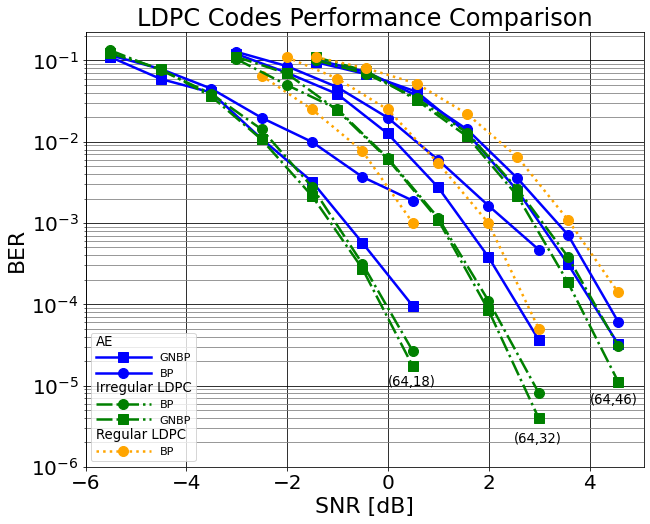

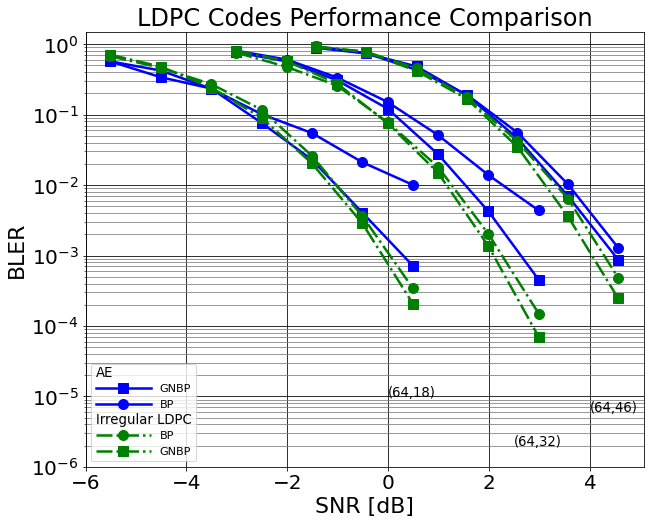

In [15]:
class LegendTitle(object):
    def __init__(self, text_props=None):
        self.text_props = text_props or {}
        super(LegendTitle, self).__init__()

    def legend_artist(self, legend, orig_handle, fontsize, handlebox):
        x0, y0 = handlebox.xdescent, handlebox.ydescent
        title = mtext.Text(x0, y0, orig_handle, usetex=False, **self.text_props)
        handlebox.add_artist(title)
        return title
 
 

def plot_data(plot_config):  
    plt.figure(figsize=(10,8))#12))
    
    legend_labels = []
    legend_categories = []
    categories_legend_dict = {}
        
    for i in range(len(plot_config['path'])):
        path = plot_config['path'][i]

        data = []
        if plot_config['y'] == 'BLER':
            with open(path + "/results/summary-bler.csv", newline="") as csvfile:
                csv_reader = csv.reader(csvfile, delimiter=",")
                for row in csv_reader:
                    data.append(row)
            y_label = 'BLER'
        else:
            with open(path + "/results/summary-ber.csv", newline="") as csvfile:
                csv_reader = csv.reader(csvfile, delimiter=",")
                for row in csv_reader:
                    data.append(row)
            y_label = 'BER'
                    
        data = np.array(data)        

        lines = plot_config['lines'][i]
        if lines == []:
            lines = ["-"]
        markers = plot_config['markers'][i]
        if markers == []:
            markers = ["^", "+", "s", "o", "*", "p", "x", ""]

        colors = plot_config['colors'][i]
        if colors == []:
            colors = ["blue","orange","green","red","purple","brown","olive","black","tab:blue"]
        
        plots = plot_config['plot'][i]     
        if plots == []:
            plots = [True]

        lines = itertools.cycle(lines)
        markers = itertools.cycle(markers)
        colors = itertools.cycle(colors)
        plots = itertools.cycle(plots)

        labels = plot_config['labels'][i]
        categories = plot_config['categories'][i]


            
        if plot_config['x'] == 'SNR':
            SNR = [float(y) for y in data[1:,1]]
            x_data = SNR
            x_label = 'SNR [dB]'
        elif plot_config['x'] == 'both':
            SNR =  [float(y) for y in data[1:,1]]
            Eb_No = [float(y) for y in data[1:,0]]
            x_data = SNR
            x_label = 'SNR [dB]'
        else:
            Eb_No = [float(y) for y in data[1:,0]]
            x_data = Eb_No
            x_label = 'Eb/No [dB]'            

        for i,name in enumerate(data[0,2:]):
            plot = next(plots)
            line = next(lines)
            marker = next(markers)
            color = next(colors)
            if plot: 
                y_data = [float(y) for y in data[1:,i+2]]  
                y_data = [y if y != 0 else None for y in y_data]  
                
                if labels == []:
                    label = name
                else:
                    label = labels[i]
            
                
                [line] = plt.plot(x_data,y_data,marker=marker,markersize=10,color=color,linestyle=line,linewidth=2.5,label=label)

                
                if categories == []:
                    category = None
                else:
                    category = categories[i]
                    if category not in legend_categories:
                        legend_categories.append(category)
                        legend_categories.append(line)
                        legend_labels.append("")
                        legend_labels.append(label)
                        categories_legend_dict[category] = [label]
                    else:
                        if label not in categories_legend_dict[category]: 
                            legend_categories.append(line)
                            legend_labels.append(label)
                            categories_legend_dict[category].append(label)

    if plot_config['plot_uncoded_BPSK']:
        # Uncoded BPSK REF
        SNR_dB_uncoded_BPSK =    [3.010299956,4.010299956,5.010299956,6.010299956,7.010299956,8.010299956,9.010299956,10.0102999566,11.0102999566,12.0102999566]
        Eb_No_dB_uncoded_BPSK =          [0          ,1         ,2          ,3          ,4          ,5          ,6          ,7            ,8            ,9            ]
        BER_uncoded_BPSK =  [0.077499986,0.063125014,0.037250005,0.021617651,0.012291674,0.005711551,0.002418843,0.00081869116,0.00017563792,3.4400284e-05]
        BLER_uncoded_BPSK = [0.077499986,0.063125014,0.037250005,0.021617651,0.012291674,0.005711551,0.002418843,0.00081869116,0.00017563792,3.4400284e-05]

        if plot_config['x'] == 'SNR':
            x_data = SNR_dB_uncoded_BPSK
        else:
            x_data = Eb_No_dB_uncoded_BPSK
        if plot_config['y'] == 'BLER':
            y_data = BLER_uncoded_BPSK
        else:
            y_data = BER_uncoded_BPSK   
        
        line = next(lines)
        marker = next(markers)
        color = next(colors)
        
        if labels == []:
            label = "Uncoded BPSK"
        else:
            label = labels[i+1]
                
        [line] = plt.plot(x_data,y_data,marker=marker,markersize=10,color=color,linestyle=line,linewidth=2.5,label=label)
        
        if categories == []:
            category = None
        else:
            category = categories[i]
            if category not in legend_categories:
                legend_categories.append(category)
                legend_categories.append(line)
                legend_labels.append("")
                legend_labels.append(label)
                categories_legend_dict[category] = [label]
            else:
                if label not in categories_legend_dict[category]: 
                    legend_categories.append(line)
                    legend_labels.append(label)
                    categories_legend_dict[category].append(label)  
        
                            
    title_fontsize = 24 
    ax_labels_fontsize = 22
    ticks_fontsize = 20
    legend_categories_fontsize = 13.25
    legend_labels_fontsize = 11.25
                          
    plt.grid(b=True, which="major", color="black")
    plt.grid(b=True, which="minor", color="grey")
    plt.yscale("log")
    plt.xlabel(x_label, fontsize=ax_labels_fontsize)
    plt.ylabel(y_label, fontsize=ax_labels_fontsize)
    plt.xlim(plot_config['min_x'],plot_config['max_x'])
    plt.ylim(plot_config['min_y'],plot_config['max_y'])
    plt.xticks(fontsize=ticks_fontsize)
    plt.yticks(fontsize=ticks_fontsize)
    plt.title(plot_config['title'], fontsize=title_fontsize)

    plt.annotate("(64,18)", xy=(0,1e-5), fontsize=legend_categories_fontsize)
    plt.annotate("(64,32)", xy=(2.5,2e-6), fontsize=legend_categories_fontsize)
    plt.annotate("(64,46)", xy=(4,6e-6), fontsize=legend_categories_fontsize)    
             
    if categories == []:
        plt.legend()
    else:
        plt.legend(legend_categories,legend_labels,fontsize=legend_labels_fontsize, handler_map={str: LegendTitle({"fontsize": legend_categories_fontsize})},handlelength=0.35*max([len(txt) for txt in categories]),loc='lower left',)
      
      
    if plot_config['save']:
        plt.savefig(
            f"study-ae-paper/LDPC_comparison_{plot_config['y']}_vs_{plot_config['x']}.png", format="png", dpi=500
        )
            
    plt.show()
    
plot_config['min_y'] = 1e-6
plot_config['min_x'] = -6
plot_config['y'] = 'BER'    
plot_data(plot_config)

plot_config['y'] = 'BLER'    
plot_data(plot_config)


Copyright (c) 2022 Orange

Authors: Guillaume Larue <guillaume.larue@orange.com>, Quentin Lampin <quentin.lampin@orange.com>, Louis-Adrien Dufrene <louisadrien.dufrene@orange.com>

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), 
to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, 
and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice (including the next paragraph) shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS 
FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER 
IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE